In [10]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as pf
import warnings
from astropy.table import Table, vstack
from scipy.ndimage.filters import median_filter as median_filter
import desispec.io
import desispec.coaddition
warnings.filterwarnings('ignore')

In [11]:
def extracting_spectrum(targetid, tileid, paddleid,subset):
    directory = '/global/cfs/cdirs/desi/spectro/redux/cascades/tiles/'+str(tileid)+'/'+str(subset)+'/'
    filename = 'coadd-'+str(paddleid)+'-'+str(tileid)+'-'+str(subset)+'.fits'
    coadd = desispec.io.read_spectra(directory+filename)
    combine = desispec.coaddition.coadd_cameras(coadd)
    index = []
    for i in range(0,len(targetid)):
        index.append(np.where(np.array(coadd.fibermap['TARGETID'])==targetid[i])[0][0])
    print(index)
    return combine.wave,combine.flux['brz'][np.array(index)],combine.ivar['brz'][np.array(index)]

In [40]:
dz_not_good_catalog = pd.read_csv('LRG_dz_not_good_catalog.csv')

In [41]:
dz_not_good_catalog

Unnamed: 0           TARGETID    Z_deep subset_deep  TILEID_deep  \
0            111  39627300953659693  1.144237     b'deep'        80673   
1            112  39627300953659693  1.144237     b'deep'        80673   
2            129  39627306632741746  1.071907     b'deep'        80673   
3            130  39627306632741746  1.071907     b'deep'        80673   
4            131  39627306632741746  1.071907     b'deep'        80673   
...          ...                ...       ...         ...          ...   
1586      172444  39633567696815224  1.308183     b'deep'        80694   
1587      172454  39633567701008493  1.289115     b'deep'        80694   
1588      172455  39633567701008493  1.289115     b'deep'        80694   
1589      172456  39633567701008493  1.289115     b'deep'        80694   
1590      172483  39633567709397266  0.922055     b'deep'        80694   

      DELTACHI2_deep  EFFTIME_DARK_deep  FIBERFLUX_Z       EBV  ZWARN_deep  \
0          32.697725        3544.111450     3.598842  0.036490           0   
1          32.697725        3544.111450     3.598842  0.036490           0   
2          38.999907        3544.111450     3.978052  0.039553           0   
3          38.999907        3544.111450     3.978052  0.039553           0   
4          38.999907        3544.111450     3.978052  0.039553           0   
...              ...                ...          ...       ...         ...   
1586       83.146021        3645.791595     3.192952  0.197145           0   
1587      193.026811        3645.791595     2.943339  0.247157           0   
1588      193.026811        3645.791595     2.943339  0.247157           0   
1589      193.026811        3645.791595     2.943339  0.247157           0   
1590     3218.304354        3645.791595    28.012384  0.198947           0   

      ...   Z_short subset_short  TILEID_short EFFTIME_DARK_short  \
0     ...  1.153200  b'20210206'         80673        1765.163574   
1     ...  1.498865  b'20210106'         80673         889.031998   
2     ...  1.177329  b'20210206'         80673        1765.163574   
3     ...  1.669977  b'20210116'         80673         879.886536   
4     ...  1.173941  b'20210106'         80673         889.031998   
...   ...       ...          ...           ...                ...   
1586  ...  1.193570  b'20210109'         80694        1651.603180   
1587  ...  0.965193  b'20210116'         80694         774.684982   
1588  ...  0.974355  b'20210109'         80694        1651.603180   
1589  ...  5.186864  b'20210214'         80694        1069.921860   
1590  ...  1.510322  b'20210214'         80694         914.463531   

      DELTACHI2_short  ZWARN_short  FIBER_short  RZR_short        dz  \
0           25.215568            0         1319       b'N'  0.004180   
1           24.625697            0         1319       b'N'  0.165387   
2           48.399835            0         1160       b'N'  0.050882   
3           34.025930            0         1160       b'N'  0.288657   
4           12.930748            0         1160       b'N'  0.049247   
...               ...          ...          ...        ...       ...   
1586        14.438922            0         2684       b'N'  0.049655   
1587        64.701088            0         2671       b'N'  0.141505   
1588       322.210292            0         2671       b'N'  0.137503   
1589       961.263084            0         2671       b'N'  1.702732   
1590       104.529446            0         3081       b'N'  0.306062   

      zfibermag  
0     21.065403  
1     21.065403  
2     20.952927  
3     20.952927  
4     20.952927  
...         ...  
1586  21.000776  
1587  21.028593  
1588  21.028593  
1589  21.028593  
1590  18.640700  

[1591 rows x 22 columns]

In [101]:
new_cut_catalog = dz_not_good_catalog[(dz_not_good_catalog['DELTACHI2_deep']>15) & (dz_not_good_catalog['DELTACHI2_short']>10) & (dz_not_good_catalog['RZR_short']=="b'N'")]

In [102]:
tileid_set = list(set(new_cut_catalog['TILEID_deep']))

In [103]:
all_tileid = np.array(new_cut_catalog['TILEID_deep'])

In [104]:
number_tileid = {}
for i in tileid_set:
    search = np.where(all_tileid==i)
    number_tileid[i]=len(search[0])

In [105]:
number_tileid

{80669: 5,
 80673: 8,
 80675: 4,
 80676: 97,
 80677: 6,
 80678: 78,
 80679: 3,
 80680: 71,
 80681: 6,
 80682: 54,
 80683: 2,
 80684: 9,
 80685: 2,
 80686: 23,
 80688: 53,
 80690: 60,
 80692: 18,
 80693: 1,
 80694: 79,
 80700: 47,
 80705: 1,
 80707: 3,
 80711: 1,
 80712: 15,
 80605: 134,
 80607: 63,
 80609: 59,
 80620: 23,
 80622: 5}

In [108]:
flux_matrix = np.zeros((100,7781,2))
for i in range(0,100):
    td = [np.array(new_cut_catalog['TARGETID'])[i]]
    tileid = np.array(new_cut_catalog['TILEID_deep'])[i]
    paddeid = np.array(new_cut_catalog['FIBER_deep'])[i] // 500
    subset_deep = str(np.array(new_cut_catalog['subset_deep'])[i])[2:-1]
    subset_short = str(np.array(new_cut_catalog['subset_short'])[i])[2:-1]

    output_deep = extracting_spectrum(td,tileid,paddeid, subset_deep)
    output_short = extracting_spectrum(td,tileid,paddeid, subset_short)
    flux_matrix[i,:,0]=output_deep[1][0]
    flux_matrix[i,:,1]=output_short[1][0]
    print(i)
print('Done')
hdu_spectra = pf.PrimaryHDU(flux_matrix)
hdu_wave = pf.ImageHDU(output_short[0]['brz'])
hdulist = pf.HDUList([hdu_spectra,hdu_wave])
hdulist.writeto('Problematic_spectra.fits',clobber=True)

INFO:spectra.py:253:read_spectra: iotime 0.548 sec to read coadd-2-80673-deep.fits at 2021-03-30T21:32:41.019773
[193]
INFO:spectra.py:253:read_spectra: iotime 0.587 sec to read coadd-2-80673-20210206.fits at 2021-03-30T21:32:48.717044
[193]
0
INFO:spectra.py:253:read_spectra: iotime 0.485 sec to read coadd-2-80673-deep.fits at 2021-03-30T21:32:56.247786
[193]
INFO:spectra.py:253:read_spectra: iotime 0.497 sec to read coadd-2-80673-20210106.fits at 2021-03-30T21:33:03.969476
[193]
1
INFO:spectra.py:253:read_spectra: iotime 0.416 sec to read coadd-2-80673-deep.fits at 2021-03-30T21:33:11.469385
[375]
INFO:spectra.py:253:read_spectra: iotime 0.484 sec to read coadd-2-80673-20210206.fits at 2021-03-30T21:33:18.840314
[375]
2
INFO:spectra.py:253:read_spectra: iotime 0.419 sec to read coadd-2-80673-deep.fits at 2021-03-30T21:33:26.496599
[375]
INFO:spectra.py:253:read_spectra: iotime 0.556 sec to read coadd-2-80673-20210116.fits at 2021-03-30T21:33:33.955700
[375]
3
INFO:spectra.py:253:read

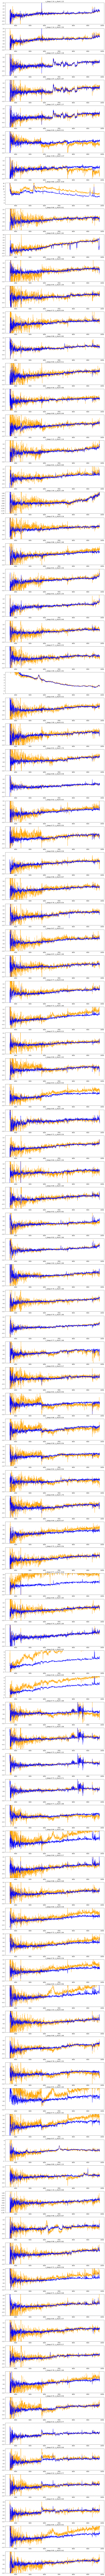

In [113]:
plt.figure(figsize=(15,400))
for index in range(0,100):
    plt.subplot(100,1,index+1)
    plt.plot(output_short[0]['brz'],median_filter(flux_matrix[index,:,1],11),color='orange')
    plt.plot(output_deep[0]['brz'],median_filter(flux_matrix[index,:,0],11),color='b')
    plt.title('z_deep:%0.2f, z_short:%0.2f' % ((np.array(new_cut_catalog['Z_deep'])[index]),np.array(new_cut_catalog['Z_short'])[index]))
    plt.ylim(-1,2*np.median(median_filter(flux_matrix[index,:,0],11))+1)